In [1]:
import pandas as pd

In [3]:
temp_df = pd.read_csv('datos/daily-min-temperatures.csv',header=0,parse_dates=[0])

In [4]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
temp_df.shape

(3650, 2)

In [8]:
temp_df.shape[0]

3650

In [9]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [10]:
train = temp_df[0:train_size]

In [11]:
train.shape

(2920, 2)

In [13]:
test = temp_df[train_size:]

In [14]:
test.shape

(730, 2)

In [15]:
df = pd.read_csv('datos/daily-min-temperatures.csv',header=0,parse_dates=[0])

In [16]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [17]:
df['t'] = df['Temp'].shift(1)

In [18]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [19]:
train,test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [20]:
df.shape

(3650, 3)

In [21]:
train.shape

(3642, 3)

In [23]:
df.tail(10)

,Date,Temp,t
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2
3642,1990-12-24,10.0,13.9
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [24]:
train.tail(10)

,Date,Temp,t
3633,1990-12-15,13.4,12.5
3634,1990-12-16,13.6,13.4
3635,1990-12-17,13.9,13.6
3636,1990-12-18,17.2,13.9
3637,1990-12-19,14.7,17.2
3638,1990-12-20,15.4,14.7
3639,1990-12-21,13.1,15.4
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2
3642,1990-12-24,10.0,13.9


In [25]:
train_x, train_y = train['t'],train['Temp']
test_x, text_y = test['t'], test['Temp']

In [26]:
predictions = test_x.copy()

In [28]:
print(predictions)
print(text_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(text_y, predictions)
mse

3.4228571428571413

In [31]:
from matplotlib import pyplot

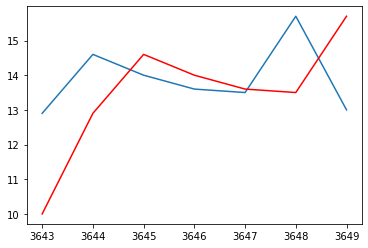

In [33]:
pyplot.plot(text_y) #Valores actuales
pyplot.plot(predictions,color='red') #Prediccion

In [34]:
## Autoregression Model

In [49]:
df = pd.read_csv('datos/daily-min-temperatures.csv',header=0,parse_dates=[0])

In [50]:
train,test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [51]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [52]:
#from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AR

In [53]:
model = AR(train)
model_fit = model.fit()

In [54]:
## No. of lag variables
model_fit.k_ar

29

In [56]:
##Coef of lag variables
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [57]:
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [58]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [59]:
predictions.iloc[0]

11.871274847727832

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(text_y,predictions)
mse

1.5015252310069829

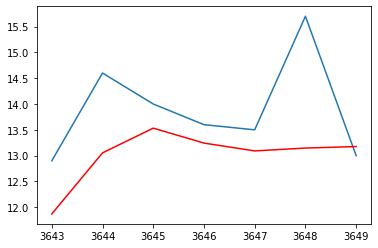

In [62]:
pyplot.plot(text_y)
pyplot.plot(predictions,color='red')

In [64]:
## Walk Fordward

In [68]:
df = pd.read_csv('datos/daily-min-temperatures.csv',header=0,parse_dates=[0])
import numpy as np

In [69]:
train,test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [70]:
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data),end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data,t)
    data = pd.Series(data)

11.871274847727832
13.660699943835198
14.353164144090162
13.430120791627012
13.374756477185125
13.4791112994205
14.767773018439879


In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values,predict)
mse

1.45245684251854

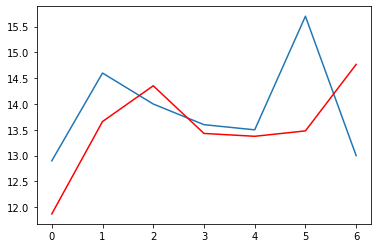

In [72]:
pyplot.plot(test.values)
pyplot.plot(predict, color ='red')